<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Red_Neuronal_Python_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importaciones de librerías necesarias

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn. datasets import make_circles



Creamos el dataset que vamos a tratar de clasificar y le echamos. Recordaremos que este problema no se puede solucionar con un perceptrón directamente, ya que las categorías no son separables de forma lineal


In [11]:
# Creamos el dataset

n = 500 # Número de muestras
p= 2 # Número de características por muestra

X,Y = make_circles(n_samples=n, noise = 0.1, factor=0.5)



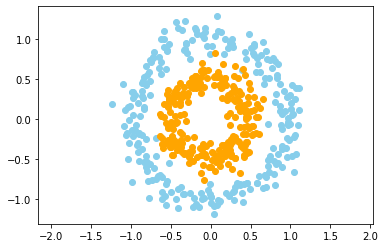

In [12]:
#Plot de las distintas partes del dataset que acabamos de crear

plt.scatter(X[Y==0,0], X[Y==0,1], c="skyblue")
plt.scatter(X[Y==1,0], X[Y==1,1], c="orange")
plt.axis("equal")
plt.show()

Ahora debemos crear la estructura de nuestra red neuronal. 
Vamos a empezar por crear una clase que defina cada capa de nuestra red. 

El parámetro número de conexiones (n_conn) se refiere al número de entradas (Conexiones desde la capa anterior). EL parámetro n_neur se refiere al número de neuronas de la capa actual.

In [13]:
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)*2 -1 # generamos aleatoriamente un vector con los bias de nuestra capa.
                                        # Les asignamos un valor inicial aleatorio normalizado entre -1 y 1.
    self.W = np.random.rand(n_conn, n_neur)*2-1 # Lo mismo con la matriz de pesos.

Creamos ahora nuestra función de activación. Implementamos tanto la función sigmoide como la función relu, para tenerlas disponibles posteriormente. Cada función incluye también su derivada, ya que como sabemos, vamos a necesitar la derivada de la función sigmoide a la hora de calcular el gradiente.

Por ejemplo, en le función sigm tenemos un primer elemento

1 / (1+ np.e ** (-x))

para la función sigmoide, y un segundo término

lambda x: x*(1-x)

para su derivada. Podemos acceder a la función sigmoide o a su derivada haciendo simplemente sigm[0] y sigm[1]



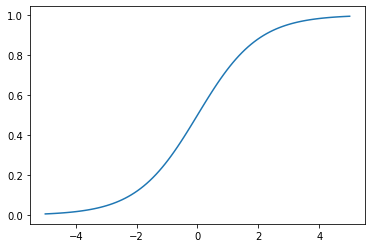

In [26]:
sigm = (lambda x: 1 / (1+ np.e ** (-x)), lambda x: x*(1-x))
relu = (lambda x: x if x > 0 else 0, lambda x: 1 if x > 0 else 0)

# Vamos a plotear ambas funciones para ver si está todo correcto
_x = np.linspace(-5,5,100)
y = [sigm[0](i) for i in _x]
plt.plot(_x,y)

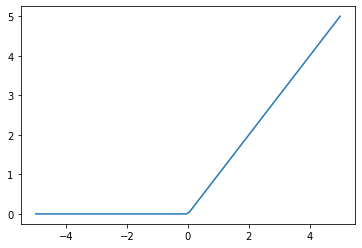

In [27]:
y = [relu[0](i) for i in _x]
plt.plot(_x,y)